In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl

from gym.environment import MissileEnv, MissileEnvSettings
from agents.proportional_nav import ProportionalNavigationAgent
from models.missile import MissileModel
import models.physics as physics
import numpy as np
import time

from visualization.matplot_viz import MatplotVisualizer
from visualization.plotly_viz import PlotlyVisualizer


settings = MissileEnvSettings()
settings.time_step = 0.01  # Time step for the simulation
settings.realtime = False

interceptor_speed = physics.mach_to_ms(4.0)  # Speed of the interceptor in m/s
target_speed = physics.mach_to_ms(1.0)  # Speed of the target in m/s

target = MissileModel(velocity=np.array([100, target_speed, 0.0]), max_acc=100 * 9.81, pos=np.array([0.0, 0.0, 20_000.0]))
interceptor = MissileModel(velocity=np.array([0.0, 0.0, interceptor_speed]), max_acc=100 * 9.81, pos=np.array([0.0, 0.0, 100.0]))

init_distance = np.linalg.norm(interceptor.pos - target.pos)  # Initial distance between interceptor and target

env = MissileEnv(settings=settings, target=target, interceptor=interceptor)
agent = ProportionalNavigationAgent(max_acc=100*9.81, max_speed=interceptor_speed, n=7.0)

done = False
obs = env.reset()

viz = MatplotVisualizer()
viz.set_episode_data(env.current_episode)

last_time = time.time()
max_render_fps = 10.0

while not done:
    action = agent.step(obs, settings.time_step)  # Get the acceleration command from the agent
    obs, reward, done, _, _ = env.step(action)  # Take a step in the environment
    
# viz.playback(env.sim_time, speed=5.0)
viz.render(env.sim_time)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Save and Playback

In [52]:
viz.playback(env.sim_time, speed=10.0)
viz.save_playback("output.gif", env.sim_time, 10.0, 5)

MovieWriter imagemagick unavailable; using Pillow instead.


Creating GIF with 26 frames.
GIF saved as output.gif


## Plot Distance over time

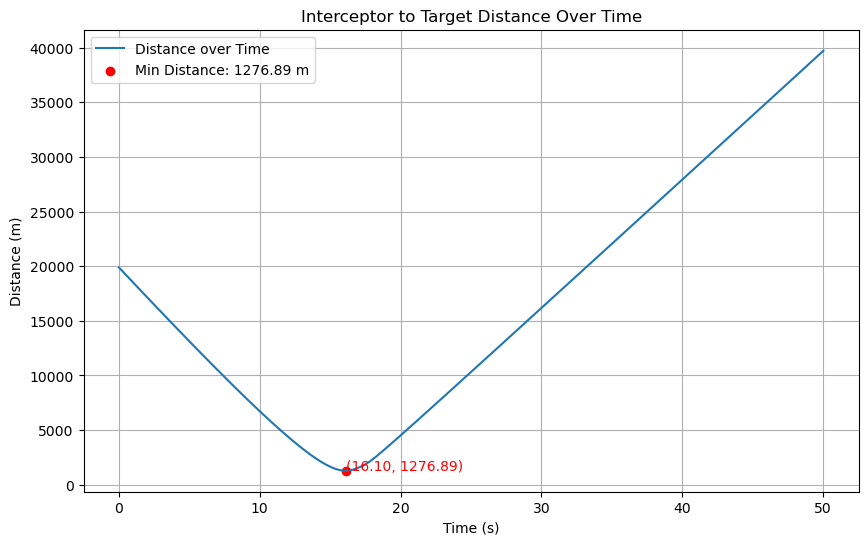

In [55]:
# get all distances from the interceptor to the target
distances = {time: state.distance for time, state in env.current_episode.get_interceptor("Agent").states.all.items()}

import matplotlib.pyplot as plt
import numpy as np

times = list(distances.keys())
distance_values = list(distances.values())

plt.figure(figsize=(10, 6))
plt.plot(times, distance_values, label="Distance over Time")

# Find the minimum value and its corresponding time
min_distance = min(distance_values)
min_time = times[distance_values.index(min_distance)]

# Add a label for the minimum value
plt.scatter(min_time, min_distance, color='red', label=f"Min Distance: {min_distance:.2f} m")
plt.text(min_time, min_distance, f"({min_time:.2f}, {min_distance:.2f})", color='red', fontsize=10)

plt.xlabel("Time (s)")
plt.ylabel("Distance (m)")
plt.title("Interceptor to Target Distance Over Time")
plt.legend()
plt.grid(True)
plt.show()

# Missile Interceptor Reinforcement Learning

## Proportional Guidance